In [1]:
!pip3 install -U ucimlrepo 

In [2]:
!pip install xgboost

In [3]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, log_loss, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score



In [4]:
nursery = fetch_ucirepo(id=76) 

In [5]:
X = nursery.data.features 
y = nursery.data.targets 

In [6]:
print(nursery.metadata) 

{'uci_id': 76, 'name': 'Nursery', 'repository_url': 'https://archive.ics.uci.edu/dataset/76/nursery', 'data_url': 'https://archive.ics.uci.edu/static/public/76/data.csv', 'abstract': ' Nursery Database was derived from a hierarchical decision model originally developed to rank applications for nursery schools.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 12960, 'num_features': 8, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 14 2024', 'dataset_doi': '10.24432/C5P88W', 'creators': ['Vladislav Rajkovic'], 'intro_paper': {'title': 'An application for admission in public school systems', 'authors': 'M. Olave, V. Rajkovic, M. Bohanec', 'published_in': 'Expert Systems in Public Administration', 'year': 1989, 'url': 'https://www.academia.edu/16670755/An_applica

In [7]:
print(nursery.variables) 

       name     role         type demographic  \
0   parents  Feature  Categorical        None   
1  has_nurs  Feature  Categorical        None   
2      form  Feature  Categorical        None   
3  children  Feature  Categorical        None   
4   housing  Feature  Categorical        None   
5   finance  Feature  Categorical        None   
6    social  Feature  Categorical        None   
7    health  Feature  Categorical        None   
8     class   Target  Categorical        None   

                                         description units missing_values  
0                     usual, pretentious, great_pret  None             no  
1  proper, less_proper, improper, critical, very_...  None             no  
2            complete, completed, incomplete, foster  None             no  
3                                      1, 2, 3, more  None             no  
4                    convenient, less_conv, critical  None             no  
5                                 convenient, inconv 

In [8]:
nursery_df = pd.DataFrame(data=X, columns=nursery.data.feature_names)
nursery_df['target'] = y

In [9]:
nursery_df

,parents,has_nurs,form,children,housing,finance,social,health,target
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommend
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommend
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [10]:
nursery_df['target'].value_counts()

target
not_recom     4320
priority      4266
spec_prior    4044
very_recom     328
recommend        2
Name: count, dtype: int64

In [11]:
nursery_df['parents'].value_counts()

parents
usual          4320
pretentious    4320
great_pret     4320
Name: count, dtype: int64

In [12]:
nursery_df['has_nurs'].value_counts()

has_nurs
proper         2592
less_proper    2592
improper       2592
critical       2592
very_crit      2592
Name: count, dtype: int64

In [13]:
nursery_df['form'].value_counts()

form
complete      3240
completed     3240
incomplete    3240
foster        3240
Name: count, dtype: int64

In [14]:
nursery_df['children'].value_counts()

children
1       3240
2       3240
3       3240
more    3240
Name: count, dtype: int64

In [15]:
nursery_df['housing'].value_counts()

housing
convenient    4320
less_conv     4320
critical      4320
Name: count, dtype: int64

In [16]:
nursery_df['finance'].value_counts()

finance
convenient    6480
inconv        6480
Name: count, dtype: int64

In [17]:
nursery_df['social'].value_counts()

social
nonprob          4320
slightly_prob    4320
problematic      4320
Name: count, dtype: int64

In [18]:
nursery_df['health'].value_counts()

health
recommended    4320
priority       4320
not_recom      4320
Name: count, dtype: int64

In [19]:
nursery_c_df = nursery_df.copy().dropna()
nursery_c_df = nursery_c_df[~nursery_c_df['target'].str.contains('very_recom|recommend')]

In [20]:
# Data preprocessing: drop missing values 

In [21]:
nursery_c_df

,parents,has_nurs,form,children,housing,finance,social,health,target
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
5,usual,proper,complete,1,convenient,convenient,slightly_prob,not_recom,not_recom
6,usual,proper,complete,1,convenient,convenient,problematic,recommended,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,spec_prior
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,spec_prior
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,spec_prior


In [22]:
nursery_c_df['target'].value_counts()

target
not_recom     4320
priority      4266
spec_prior    4044
Name: count, dtype: int64

In [23]:
# Data preprocessing: Encoding (get.dummies)

In [24]:
nursery_encoded = pd.get_dummies(nursery_c_df, columns=['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health'],dtype='int')
nursery_encoded = nursery_encoded.drop('target', axis=1)  

In [25]:
nursery_encoded

,parents_great_pret,parents_pretentious,parents_usual,has_nurs_critical,has_nurs_improper,has_nurs_less_proper,has_nurs_proper,has_nurs_very_crit,form_complete,form_completed,...,housing_critical,housing_less_conv,finance_convenient,finance_inconv,social_nonprob,social_problematic,social_slightly_prob,health_not_recom,health_priority,health_recommended
1,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,0
2,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
5,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,0,1,1,0,0
6,0,0,1,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12955,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
12956,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,1,0,0
12957,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,1
12958,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0


In [26]:
nursery_encoded.columns

Index(['parents_great_pret', 'parents_pretentious', 'parents_usual',
       'has_nurs_critical', 'has_nurs_improper', 'has_nurs_less_proper',
       'has_nurs_proper', 'has_nurs_very_crit', 'form_complete',
       'form_completed', 'form_foster', 'form_incomplete', 'children_1',
       'children_2', 'children_3', 'children_more', 'housing_convenient',
       'housing_critical', 'housing_less_conv', 'finance_convenient',
       'finance_inconv', 'social_nonprob', 'social_problematic',
       'social_slightly_prob', 'health_not_recom', 'health_priority',
       'health_recommended'],
      dtype='object')

In [27]:
X = nursery_encoded
y = nursery_c_df['target'].astype('category').cat.codes

In [28]:
# Split data : 

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
dtrain = xgb.DMatrix(data=X_train, label=y_train, enable_categorical=True)
dtest = xgb.DMatrix(data=X_test, label=y_test, enable_categorical=True)

In [31]:
params = {
    'objective': 'multi:softmax', 
    'num_class': len(y.unique()),  
    'eval_metric': 'merror',       
    'max_depth': 3,
    'eta': 0.1
}

In [32]:
num_rounds = 100
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds)

In [33]:
y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]

In [34]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9904988123515439


In [35]:
cv_results = xgb.cv(params=params, dtrain=dtrain, num_boost_round=num_rounds, nfold=5, metrics='merror', seed=42)

In [36]:
print("Cross-validation results:")
print(cv_results.tail())

Cross-validation results:
    train-merror-mean  train-merror-std  test-merror-mean  test-merror-std
95           0.009971          0.001318          0.012174         0.002758
96           0.009947          0.001034          0.011778         0.002682
97           0.009501          0.000814          0.011382         0.002730
98           0.009254          0.000723          0.010788         0.002571
99           0.009130          0.001279          0.010590         0.003278


In [37]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9904988123515439
Confusion Matrix:
 [[896   0   0]
 [  0 840  21]
 [  0   3 766]]


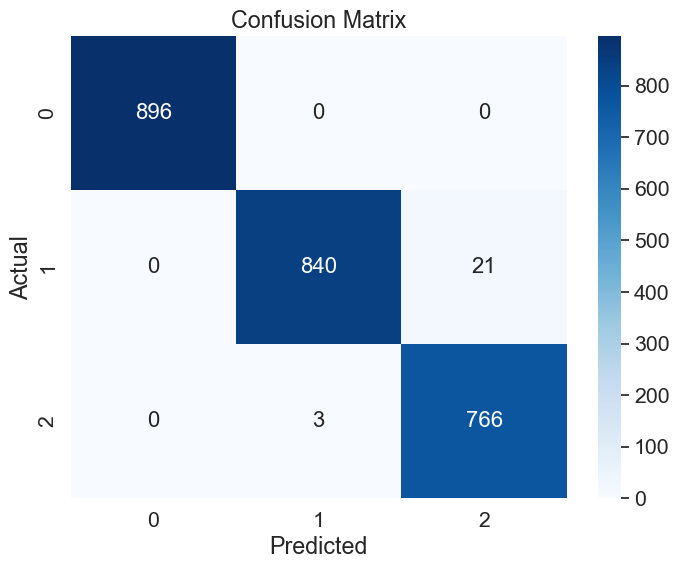

In [38]:
confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4) 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16}) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
importance_dict = model.get_score(importance_type='weight')

importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)


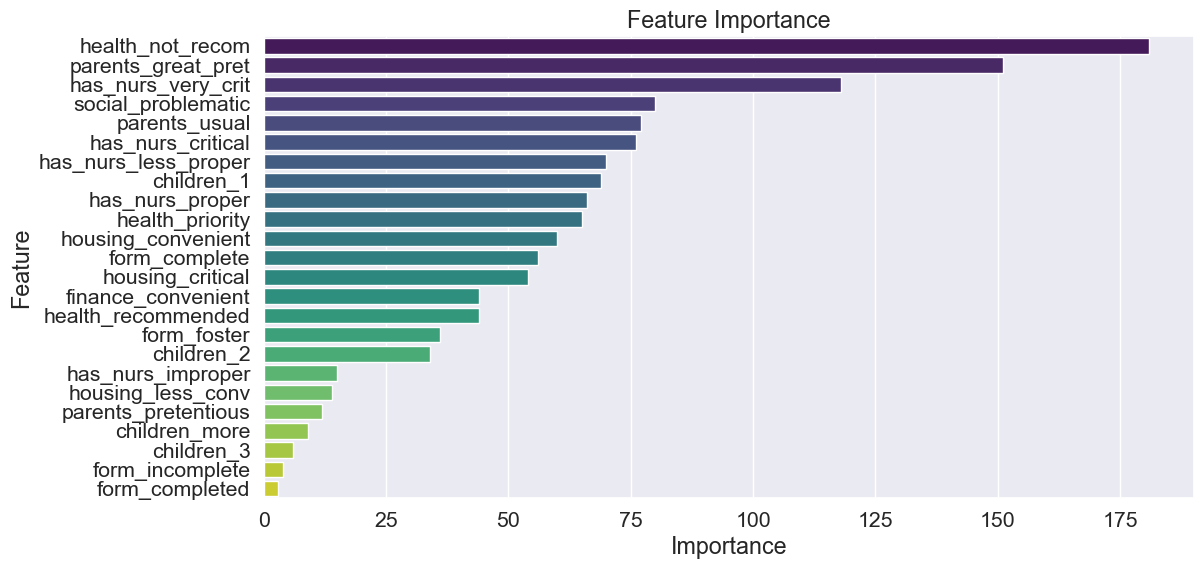

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       896
           1       1.00      0.98      0.99       861
           2       0.97      1.00      0.98       769

    accuracy                           0.99      2526
   macro avg       0.99      0.99      0.99      2526
weighted avg       0.99      0.99      0.99      2526



In [42]:
y_pred_series = pd.Series(y_pred)
value_counts = y_pred_series.value_counts()
value_counts

0.0    896
1.0    843
2.0    787
Name: count, dtype: int64

In [43]:
importance_dict = model.get_score(importance_type='gain')

In [44]:
importance_df = pd.DataFrame(list(importance_dict.items()), columns=['Feature', 'Gain'])
importance_df = importance_df.sort_values(by='Gain', ascending=False)

In [45]:
positive_impact_features = importance_df[importance_df['Gain'] > 0]
negative_impact_features = importance_df[importance_df['Gain'] <= 0]

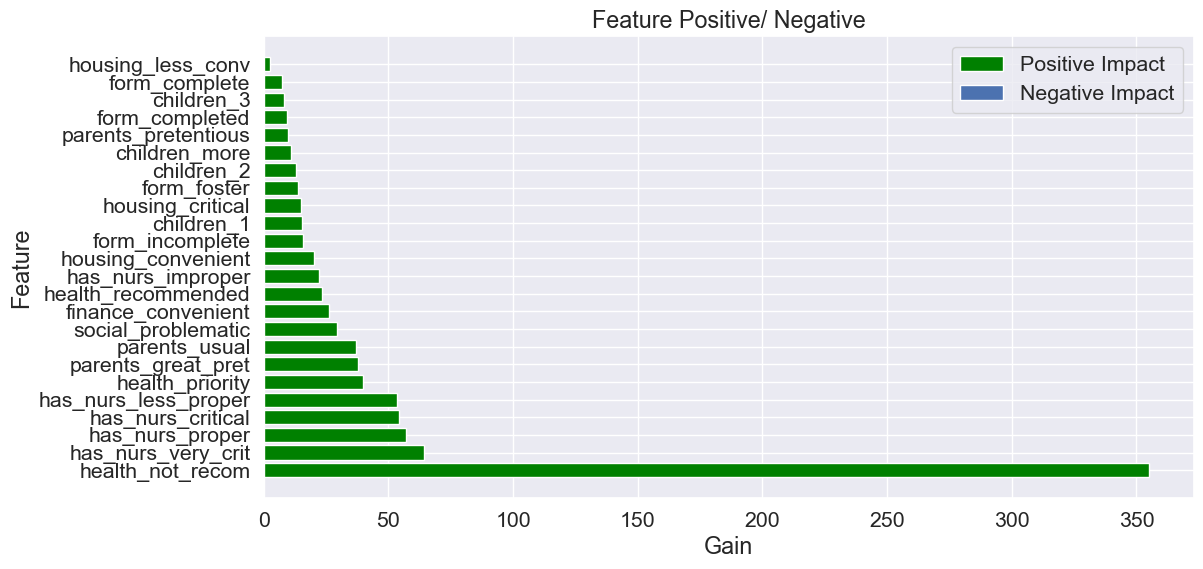

In [46]:
plt.figure(figsize=(12, 6))
plt.barh(positive_impact_features['Feature'], positive_impact_features['Gain'], color='green', label='Positive Impact')
plt.barh(negative_impact_features['Feature'], negative_impact_features['Gain'], color='red', label='Negative Impact')
plt.xlabel('Gain')
plt.ylabel('Feature')
plt.title('Feature Positive/ Negative')
plt.legend()
plt.show()

In [47]:
# Logistic Regression

In [48]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
model_logr = LogisticRegression()
model_logr.fit(X_train_scaled, y_train)

LogisticRegression()

In [52]:
y_pred = model_logr.predict(X_test_scaled)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9410134600158353


In [54]:
cv_scores = cross_val_score(model_logr, X_train_scaled, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

Cross-validation scores: [0.92726373 0.92874814 0.93023256 0.93221178 0.94009901]
Mean CV accuracy: 0.931711043939624


In [55]:
conf_matrix_result = cm(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix_result)

Confusion Matrix:
[[896   0   0]
 [  0 798  63]
 [  0  86 683]]


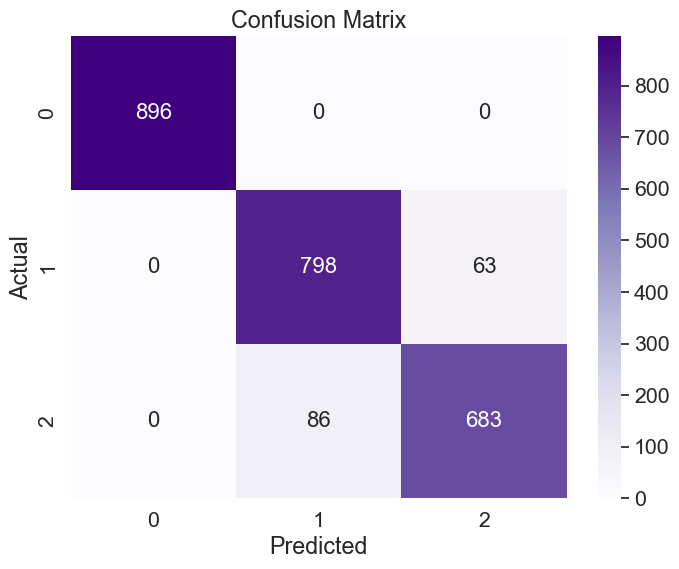

In [56]:
conf_matrix_result = cm(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4) 
sns.heatmap(conf_matrix_result, annot=True, fmt='d', cmap='Purples', annot_kws={"size": 16}) 
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
column_names = ['parents_great_pret', 'parents_pretentious', 'parents_usual',
       'has_nurs_critical', 'has_nurs_improper', 'has_nurs_less_proper',
       'has_nurs_proper', 'has_nurs_very_crit', 'form_complete',
       'form_completed', 'form_foster', 'form_incomplete', 'children_1',
       'children_2', 'children_3', 'children_more', 'housing_convenient',
       'housing_critical', 'housing_less_conv', 'finance_convenient',
       'finance_inconv', 'social_nonprob', 'social_problematic',
       'social_slightly_prob', 'health_not_recom', 'health_priority',
       'health_recommended']

In [58]:
for coefficients in model_logr.coef_: 
    coef_dict = dict(zip(column_names, coefficients))
    coef_list = []
    
    # Print the feature importances with column names
    for feature, coef in coef_dict.items():
        print(f"{feature}: {coef}")
        coef_list.append({feature: coef})
    # sorted_list = sorted(coef_list, key=lambda x: list(x.values())[0], reverse=True)
    # sorted_list
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
model_logr.classes_

parents_great_pret: 0.04088793417525801
parents_pretentious: -0.07550290035753382
parents_usual: 0.034460549007887774
has_nurs_critical: -0.05188453500094161
has_nurs_improper: -0.14213305670915716
has_nurs_less_proper: 0.046196321208657146
has_nurs_proper: 0.049542672635931075
has_nurs_very_crit: 0.09992465912287922
form_complete: 0.01010054221303312
form_completed: -0.005993601676889495
form_foster: 0.00442807808681857
form_incomplete: -0.00846802374765217
children_1: 0.016675134197137582
children_2: -0.011998022558154322
children_3: -0.0027715243043364797
children_more: -0.0018049883452910633
housing_convenient: 0.018194504896215942
housing_critical: 0.0009348112250243505
housing_less_conv: -0.01902854530124802
finance_convenient: 0.0018799184295122814
finance_inconv: -0.0018799184295122105
social_nonprob: -0.0072865467399815705
social_problematic: 0.013963107983326667
social_slightly_prob: -0.006811501269662954
health_not_recom: 3.5879150872987546
health_priority: -1.82270215689994

array([0, 1, 2], dtype=int8)

In [59]:
features1 = [
    'parents_great_pret', 'parents_pretentious', 'parents_usual',
    'has_nurs_critical', 'has_nurs_improper', 'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit',
    'form_complete', 'form_completed', 'form_foster', 'form_incomplete',
    'children_1', 'children_2', 'children_3', 'children_more',
    'housing_convenient', 'housing_critical', 'housing_less_conv',
    'finance_convenient', 'finance_inconv',
    'social_nonprob', 'social_problematic', 'social_slightly_prob',
    'health_not_recom', 'health_priority', 'health_recommended'
]

coefficients1 = [
    0.0716609143058313, -0.14652292346622994, 0.07524971630504869,
    -0.12471077363467949, -0.3042181207490385, 0.10762978848803012, 0.11553952837936182, 0.2061472846609821,
    0.023656579439598466, -0.011645161867161117, 0.0066620345927147365, -0.01828574502050079,
    0.037524891789678584, -0.023716042918071552, -0.007399743953175595, -0.006021397773780383,
    0.0392441844510383, -0.0023865882171225108, -0.0364698890892653,
    0.0053847990177368025, -0.0049970918730860405,
    -0.01146801195626927, 0.02304352582905818, -0.011187806728137609,
    6.396361522485693, -3.210562028958035, -3.1854117863829345
]

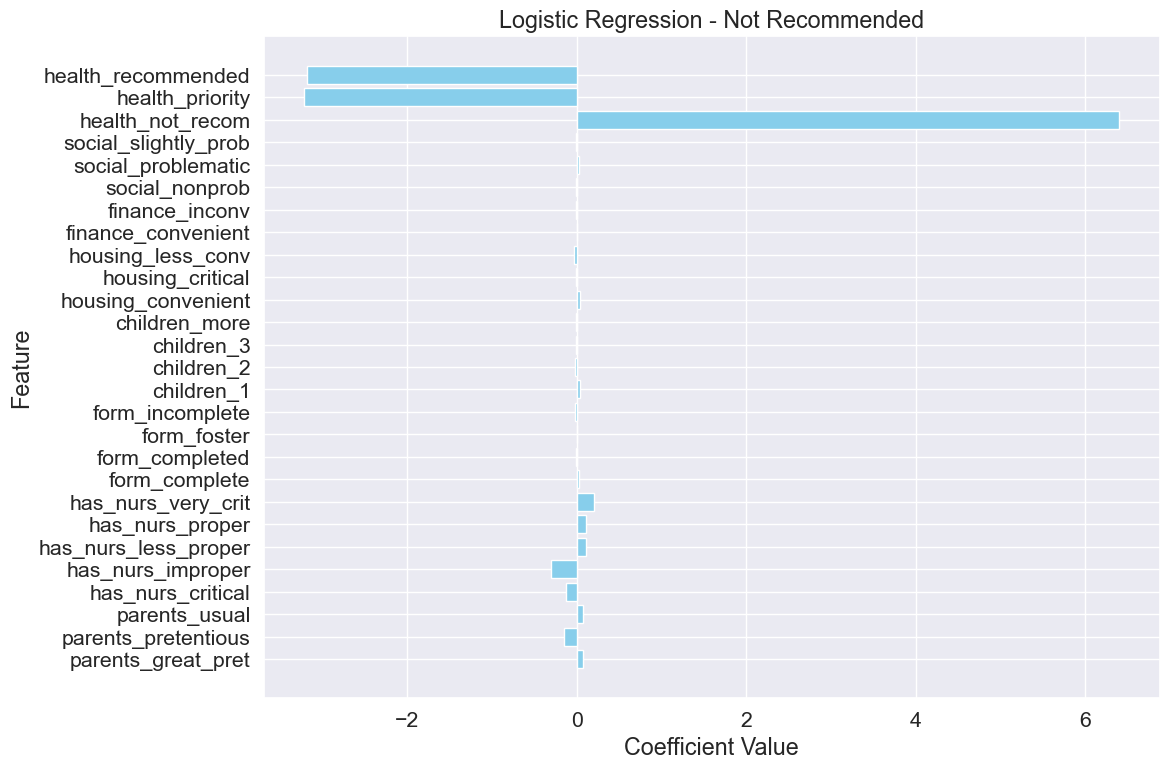

In [60]:
plt.figure(figsize=(12, 8))
plt.barh(features1, coefficients1, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression - Not Recommended')
plt.tight_layout()
plt.show()

In [61]:
features2 = [
    'parents_great_pret', 'parents_pretentious', 'parents_usual',
    'has_nurs_critical', 'has_nurs_improper', 'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit',
    'form_complete', 'form_completed', 'form_foster', 'form_incomplete',
    'children_1', 'children_2', 'children_3', 'children_more',
    'housing_convenient', 'housing_critical', 'housing_less_conv',
    'finance_convenient', 'finance_inconv',
    'social_nonprob', 'social_problematic', 'social_slightly_prob',
    'health_not_recom', 'health_priority', 'health_recommended'
]

coefficients2 = [
    -1.5174964230916541, 0.22325100382562946, 1.294259945521749,
    -1.3176463455618286, 0.20979170893161322, 1.7818162941178508, 1.8014833330461018, -2.4754304642780043,
    0.3775904101448437, 0.14311673713297943, -0.4010986366270263, -0.11959398439507155,
    0.6432719142101494, 0.14380061147907133, -0.3671825382304162, -0.41987546120306707,
    0.6863907831568414, -0.623708827083329, -0.06266742981777892,
    0.2613344130435006, -0.2613198867877659,
    0.3657987424683647, -0.706402984158554, 0.340618767945933,
    -3.244527524470953, 0.9231354864985966, 2.321406564228063
]

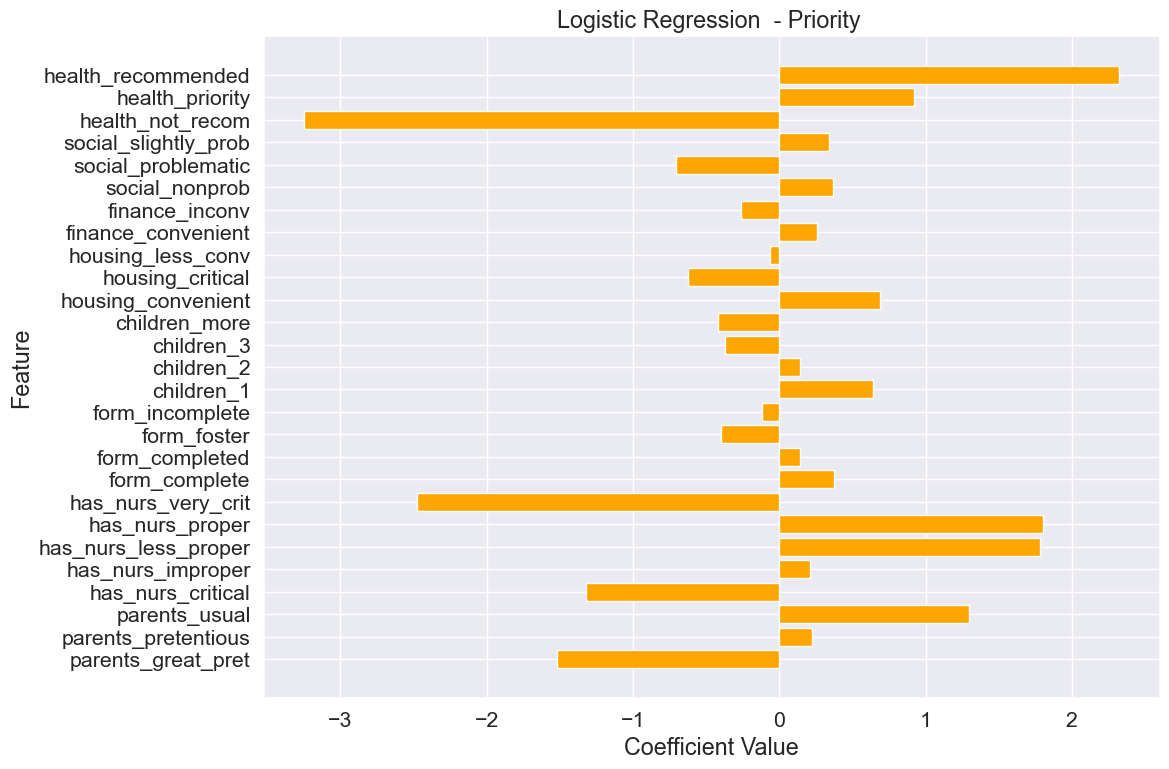

In [62]:
plt.figure(figsize=(12, 8))
plt.barh(features2, coefficients2, color='orange')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression  - Priority ')
plt.tight_layout()
plt.show()

In [63]:
features3 = [
    'parents_great_pret', 'parents_pretentious', 'parents_usual',
    'has_nurs_critical', 'has_nurs_improper', 'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit',
    'form_complete', 'form_completed', 'form_foster', 'form_incomplete',
    'children_1', 'children_2', 'children_3', 'children_more',
    'housing_convenient', 'housing_critical', 'housing_less_conv',
    'finance_convenient', 'finance_inconv',
    'social_nonprob', 'social_problematic', 'social_slightly_prob',
    'health_not_recom', 'health_priority', 'health_recommended'
]
coefficients3 = [
    1.4458355087858077, -0.07672808035940058, -1.3695096618268194,
    1.4423571191965099, 0.09442641181742673, -1.8894460826058792, -1.9170228614254872, 2.2692831796170423,
    -0.4012469895844498, -0.13147157526581926, 0.3944366020343051, 0.1378797294155703,
    -0.6807968059998214, -0.1200845685609959, 0.37458228218359046, 0.4258968589768471,
    -0.725634967607865, 0.6260954153004517, 0.09913731890703512,
    -0.2667192120612362, 0.26631697866084986,
    -0.35433073051209946, 0.6833594583295035, -0.3294309612177959,
    -3.1518339980146473, 2.2874265424594467, 0.8640052221548257
]

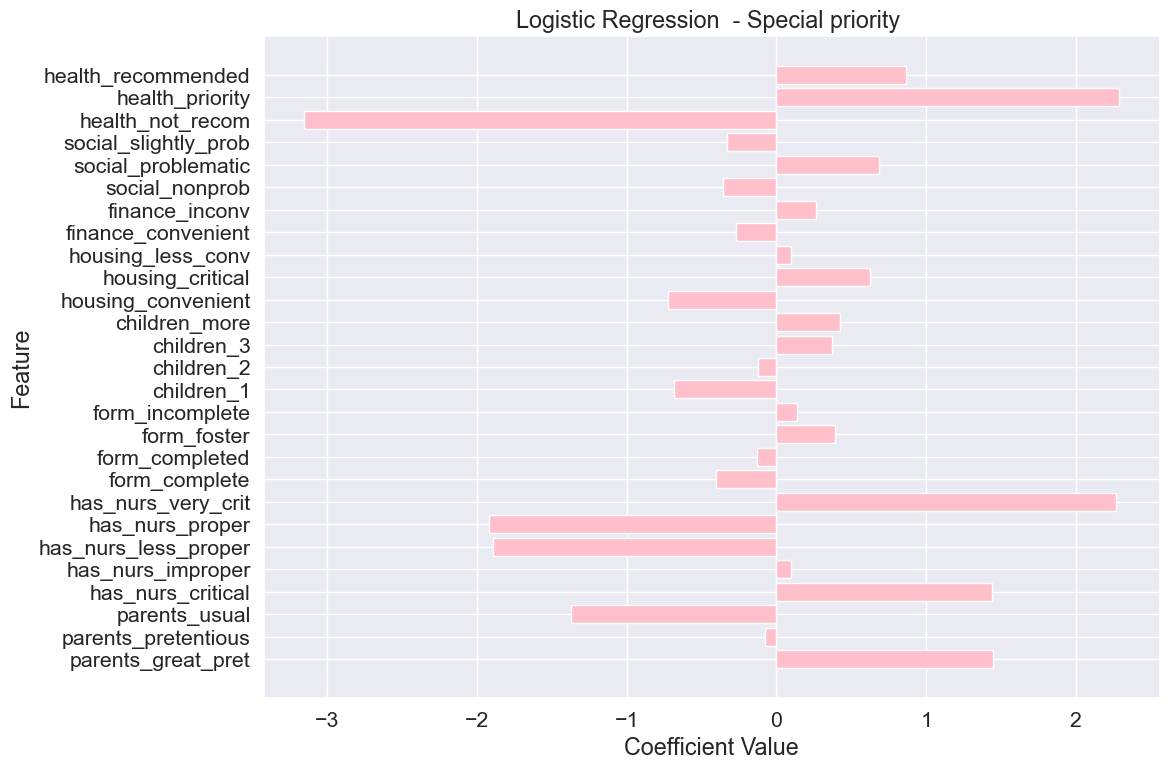

In [64]:
plt.figure(figsize=(12, 8))
plt.barh(features3, coefficients3, color='pink')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Logistic Regression  - Special priority ')
plt.tight_layout()
plt.show()

In [65]:
# Graph with all the consolidation

In [66]:
model_accuracy = {
    'GXboost': 0.99,
    'Random Forest': 0.99,
    'Decision Tree': 0.88,
    'SVC Linear': 0.95,
    'SVC Poly': 0.99,
    'Log Regression': 0.94,
   
}

In [67]:
df = pd.DataFrame(list(model_accuracy.items()), columns=['Model', 'Accuracy'])
df = df.sort_values(by='Accuracy', ascending=True)

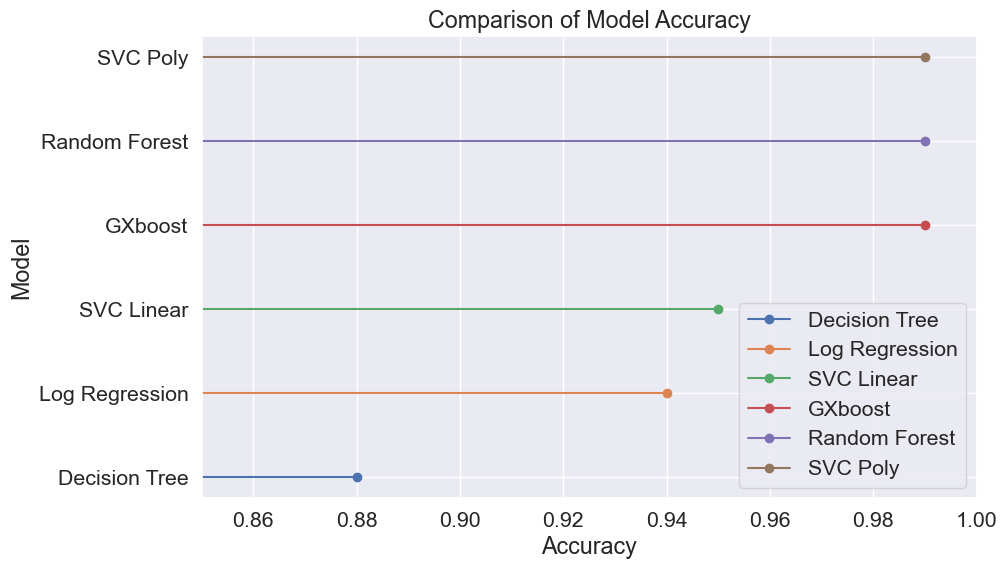

In [68]:
plt.figure(figsize=(10, 6))

for model, accuracy in zip(df['Model'], df['Accuracy']):
    plt.plot([0, accuracy], [model, model], marker='o', linestyle='-', label=model)
plt.ylabel('Model')
plt.xlabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.xlim(0.85, 1)  
plt.legend()
plt.show()

In [69]:
# Decison Tree

In [70]:
nursery_encoded.columns

Index(['parents_great_pret', 'parents_pretentious', 'parents_usual',
       'has_nurs_critical', 'has_nurs_improper', 'has_nurs_less_proper',
       'has_nurs_proper', 'has_nurs_very_crit', 'form_complete',
       'form_completed', 'form_foster', 'form_incomplete', 'children_1',
       'children_2', 'children_3', 'children_more', 'housing_convenient',
       'housing_critical', 'housing_less_conv', 'finance_convenient',
       'finance_inconv', 'social_nonprob', 'social_problematic',
       'social_slightly_prob', 'health_not_recom', 'health_priority',
       'health_recommended'],
      dtype='object')

In [71]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)

In [74]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [75]:
y_pred = clf.predict(X_test)

In [76]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.900633412509897


In [77]:
scores = cross_val_score(clf, X, y, cv=5)

In [78]:
print("Cross-validated scores:", scores)
print("Mean accuracy:", np.mean(scores))

Cross-validated scores: [0.69992082 0.80482977 0.75415677 0.79334917 0.67458432]
Mean accuracy: 0.7453681710213778


In [79]:
importances = clf.feature_importances_

In [80]:
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

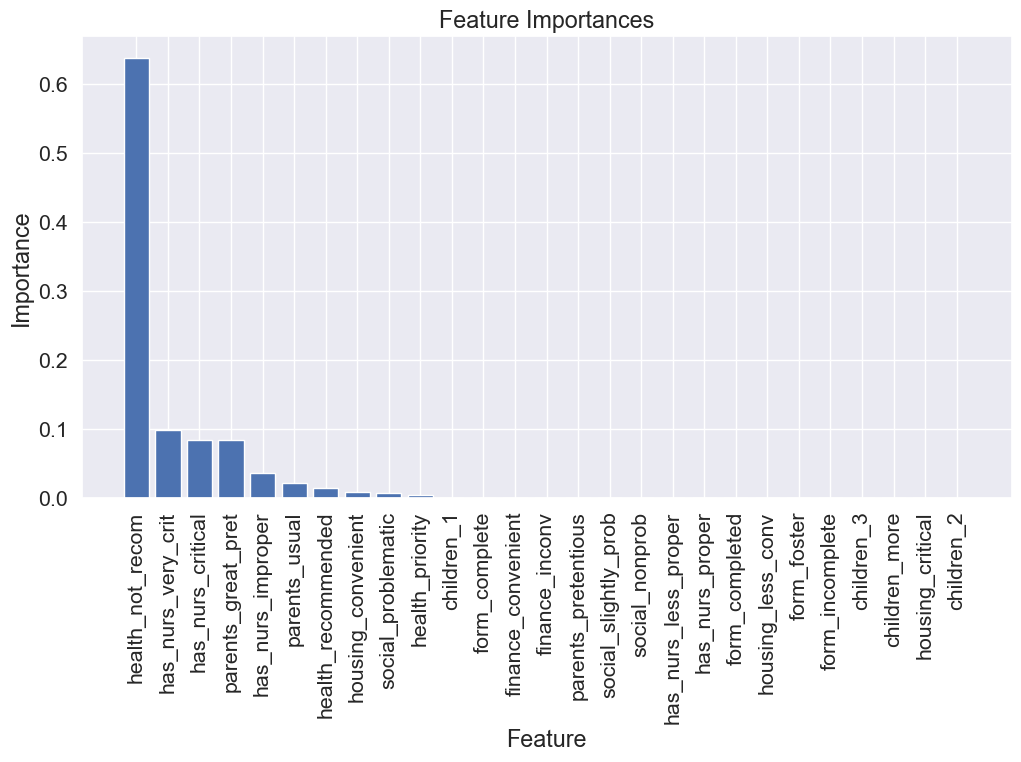

In [81]:
plt.figure(figsize=(12, 6))
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [82]:
X_clf = nursery_encoded.copy()[['health_not_recom', 'has_nurs_very_crit', 'has_nurs_critical', 'parents_great_pret', 'has_nurs_improper']]

In [83]:
X_clf_train, X_clf_test, y_train, y_test = train_test_split(X_clf, y, test_size=0.2, random_state=42)

In [84]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=5)

In [85]:
clf.fit(X_clf_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [86]:
y_pred_clean = clf.predict(X_clf_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred_clean)
print("Accuracy:", accuracy)

Accuracy: 0.885193982581156


In [88]:
scores2 = cross_val_score(clf, X_clf, y, cv=5)

In [89]:
print("Cross-validated scores:", scores2)
print("Mean accuracy:", np.mean(scores2))

Cross-validated scores: [0.98020586 0.84996041 0.75415677 0.70467142 0.66231196]
Mean accuracy: 0.7902612826603325


In [90]:
cm_array = confusion_matrix(y_test, y_pred_clean)

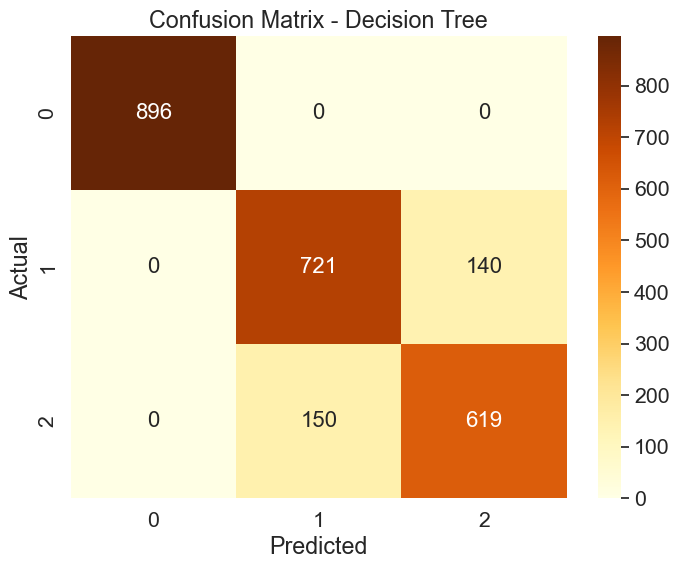

In [91]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm_array, annot=True, fmt='d', cmap='YlOrBr', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [92]:
# SVC

In [93]:
from sklearn.svm import SVC

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
svc = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [97]:
y_pred_linear = svc.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Linear Kernel Accuracy:", accuracy_linear)

Linear Kernel Accuracy: 0.948535233570863


In [98]:
print("Linear Kernel Classification Report:")
print(classification_report(y_test,y_pred_linear))

Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       896
           1       0.92      0.93      0.92       861
           2       0.92      0.91      0.92       769

    accuracy                           0.95      2526
   macro avg       0.95      0.95      0.95      2526
weighted avg       0.95      0.95      0.95      2526



In [99]:
cv_scores = cross_val_score(svc, X_train_scaled, y_train, cv=5)

In [100]:
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.9346858  0.93320139 0.93617021 0.9346858  0.94257426]
Mean CV Accuracy: 0.9362634907726299


In [101]:
import numpy as np

In [102]:
column_names = [
    'parents_pretentious', 'parents_usual', 'has_nurs_improper',
       'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit',
       'form_completed', 'form_foster', 'form_incomplete', 'children_2',
       'children_3', 'children_more', 'housing_critical', 'housing_less_conv',
       'finance_inconv', 'social_problematic', 'social_slightly_prob',
       'health_priority', 'health_recommended']
   


In [103]:
if svc.kernel == 'linear':
    print("The SVM model is using a linear kernel.")
elif svc.kernel == 'poly':
    print("The SVM model is using a polynomial kernel.")
else:
    print("The SVM model is using a different kernel.")
    
for coefficients in svc.coef_: 
    coef_dict = dict(zip(column_names, coefficients))
    coef_list = []
    
    # Print the feature importances with column names
    for feature, coef in coef_dict.items():
        print(f"{feature}: {coef}")
        coef_list.append({feature: coef})
    # sorted_list = sorted(coef_list, key=lambda x: list(x.values())[0], reverse=True)
    # sorted_list
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


The SVM model is using a linear kernel.
parents_pretentious: 0.0
parents_usual: 0.0
has_nurs_improper: 0.0
has_nurs_less_proper: 0.0
has_nurs_proper: 2.7755575615628914e-17
has_nurs_very_crit: 0.0
form_completed: 0.0
form_foster: 0.0
form_incomplete: 0.0
children_2: 0.0
children_3: 0.0
children_more: 0.0
housing_critical: 0.0
housing_less_conv: 0.0
finance_inconv: -2.7755575615628914e-17
social_problematic: 0.0
social_slightly_prob: 0.0
health_priority: 0.0
health_recommended: -1.3877787807814457e-17
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
parents_pretentious: -1.798453952181478e-05
parents_usual: 0.0
has_nurs_improper: 1.8234623061830213e-05
has_nurs_less_proper: 0.0
has_nurs_proper: 0.0
has_nurs_very_crit: 4.502152050597785e-05
form_completed: 0.0
form_foster: -4.403559057086781e-05
form_incomplete: -1.8543557567307634e-05
children_2: 1.3561084208579821e-05
children_3: 4.900775794625112e-06
child

In [104]:
coefficients

array([-1.05961593e+00,  1.27863179e-01,  9.45785860e-01, -7.78892504e-01,
        8.23882832e-02,  1.07004741e+00,  1.06472843e+00, -1.38353012e+00,
        2.16814825e-01,  5.47096082e-02, -2.17198988e-01, -5.30139945e-02,
        3.79165889e-01,  5.66859345e-02, -2.14328614e-01, -2.15853945e-01,
        4.53557959e-01, -3.72870457e-01, -7.44966377e-02,  1.56703236e-01,
       -1.56703236e-01,  2.18959682e-01, -4.32563195e-01,  2.17794210e-01,
       -1.13686838e-13, -4.37024170e-01,  4.45795591e-01])

In [105]:
features3 = [
  'parents_pretentious', 'parents_usual', 'has_nurs_improper',
       'has_nurs_less_proper', 'has_nurs_proper', 'has_nurs_very_crit',
       'form_completed', 'form_foster', 'form_incomplete', 'children_2',
       'children_3', 'children_more', 'housing_critical', 'housing_less_conv',
       'finance_inconv', 'social_problematic', 'social_slightly_prob',
       'health_priority', 'health_recommended']


coefficients3 = [
    1.17729003e+00,  1.98995268e+00,  8.53520398e-01,  1.82796743e+00,
        1.81862792e+00, -6.06267159e-01, -1.62634590e-01, -4.33908606e-01,
       -2.71585387e-01, -3.23281210e-01, -5.98138414e-01, -5.99652430e-01,
       -8.31907846e-01, -5.29776924e-01, -3.12846338e-01, -6.52434486e-01,
       -1.78002542e-04, -4.36361433e-01,  4.45119552e-01]


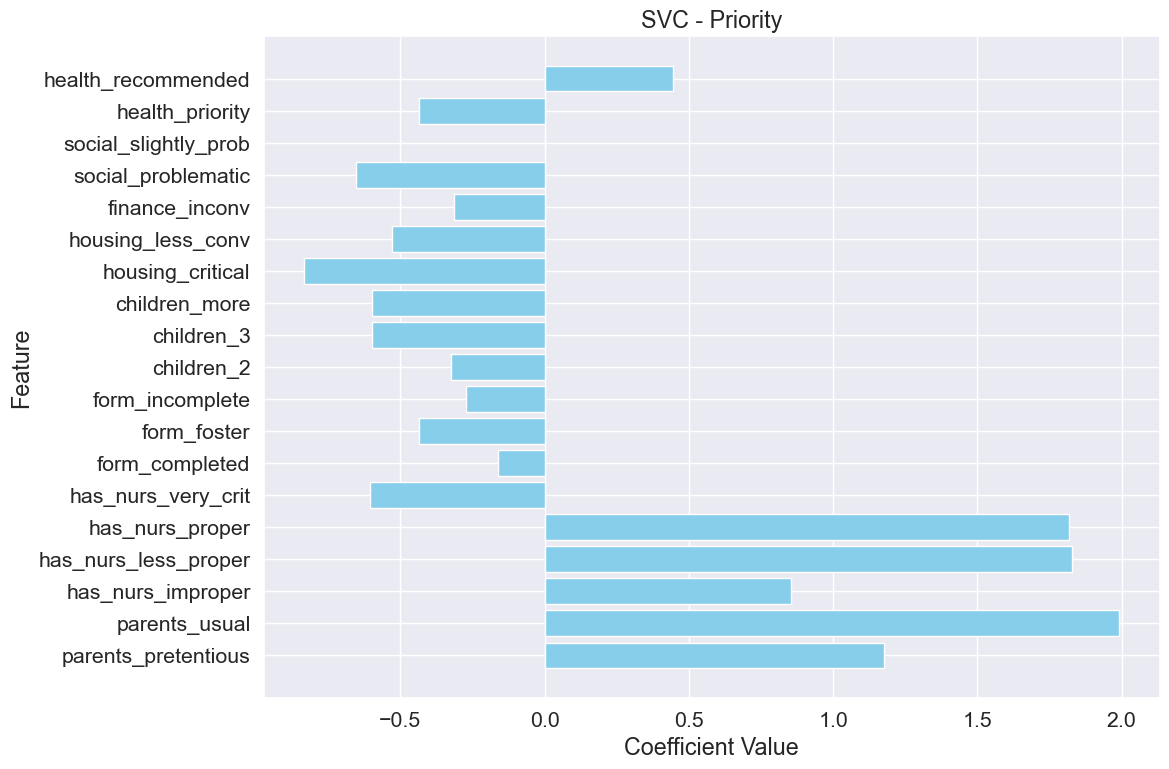

In [106]:
plt.figure(figsize=(12, 8))
plt.barh(features3, coefficients3, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('SVC - Priority')
plt.tight_layout()
plt.show()

In [107]:
# Apply SVC model Poly 

In [108]:
# Initialize and train the SVC model with Polynomial kernel
svc_p = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svc_p.fit(X_train, y_train)

SVC(kernel='poly', random_state=42)

In [109]:
y_pred_poly = svc_p.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("Polynomial Kernel Accuracy:", accuracy_poly)

print("Polynomial Kernel Classification Report:")
print(classification_report(y_test, y_pred_poly))

Polynomial Kernel Accuracy: 1.0
Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       896
           1       1.00      1.00      1.00       861
           2       1.00      1.00      1.00       769

    accuracy                           1.00      2526
   macro avg       1.00      1.00      1.00      2526
weighted avg       1.00      1.00      1.00      2526



In [110]:
cv_scores = cross_val_score(svc_p, X_train_scaled, y_train, cv=5)

In [111]:
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.99752598 0.99901039 0.99802078 0.99653637 1.        ]
Mean CV Accuracy: 0.9982187036120731


In [112]:
# Confusion matrix - Linear

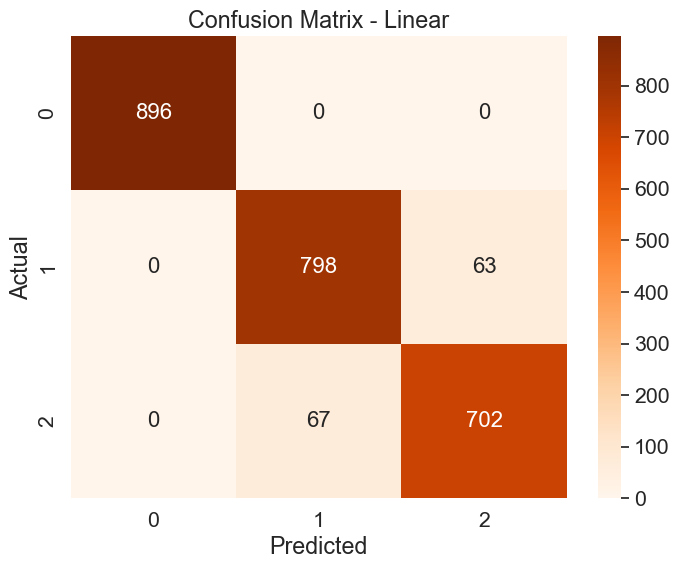

In [113]:
cm = confusion_matrix(y_test, y_pred_linear)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Linear')
plt.show()

In [114]:
# Confusion matrix - Poly

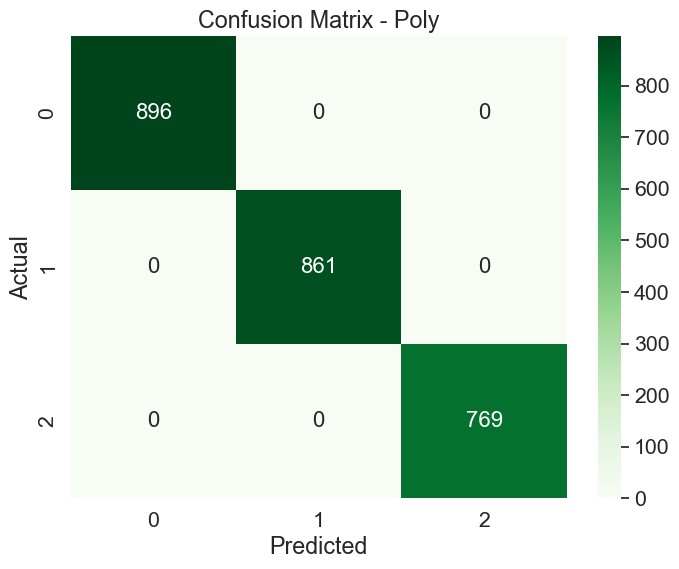

In [115]:
cm = confusion_matrix(y_test, y_pred_poly)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Poly')
plt.show()

In [116]:
# Random Forecast - referece file: Nursey - random-forest